In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import librosa
import math
import re
import os
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
import xlwt
from datetime import datetime

# Turn off TF verbose logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Using TensorFlow backend.


In [0]:
# genre_features.load_deserialize_data()

# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9, epsilon=1e-8, decay=0.
# SGD    : lr=0.01, momentum=0., decay=0.

train_X = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_train_input.npy')
train_Y = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_train_target.npy')
dev_X = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_validation_input.npy')
dev_Y = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_validation_target.npy')
test_X = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_test_input.npy')
test_Y = np.load('/content/gdrive/My Drive/Colab Notebooks/thesis/thesis_data_test_target.npy')

opt = Adam()

batch_size = 35
nb_epochs = 5,10,20,50,100,200,400



Instructions for updating:
Colocations handled automatically by placer.


In [0]:
print("Training X shape: " + str(train_X.shape))
print("Training Y shape: " + str(train_Y.shape))
print("Dev X shape: " + str(dev_X.shape))
print("Dev Y shape: " + str(dev_Y.shape))
print("Test X shape: " + str(test_X.shape))
print("Test Y shape: " + str(test_Y.shape))

input_shape = (train_X.shape[1], train_X.shape[2])
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=train_Y.shape[1], activation='softmax'))

print("Compiling ...")
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Training X shape: (280, 128, 198)
Training Y shape: (280, 4)
Dev X shape: (120, 128, 198)
Dev Y shape: (120, 4)
Test X shape: (120, 128, 198)
Test Y shape: (120, 4)
Build LSTM RNN model ...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Compiling ...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 128)          167424    
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 132       
Total params: 188,164
Trainable params: 188,164
Non-trainable params: 0
_________________________________________________________________


In [0]:
wb = xlwt.Workbook()

ws = wb.add_sheet('Class accuracy Loss')
ws.write(0, 0, 'Epoch')
ws.write(0, 1, 'validation_accuracy')
ws.write(0, 2, 'validation_loss')
ws.write(0, 3, 'testing_accuracy')
ws.write(0, 4, 'testing_loss')
ws.write(0, 5, 'duration_time_in_sec')

row=1
for l_epoch in nb_epochs :
    a = datetime.now()
    print("Training ...")
    model.fit(train_X, train_Y, batch_size=batch_size, epochs=l_epoch)
    ws.write(row, 0, l_epoch)

    print("\nValidating ...")
    scorev, accuracyv = model.evaluate(dev_X, dev_Y, batch_size=batch_size, verbose=1)
    ws.write(row, 1, accuracyv)
    ws.write(row, 2, scorev)
    print("Dev loss:  ", scorev)
    print("Dev accuracy:  ", accuracyv)


    print("\nTesting ...")
    score, accuracy = model.evaluate(test_X, test_Y, batch_size=batch_size, verbose=1)
    ws.write(row, 3, accuracy)
    ws.write(row, 4, score)
    print("Test loss:  ", score)
    print("Test accuracy:  ", accuracy)
    
    b = datetime.now()

    c = b - a
    print ('Duration time Epoch', l_epoch,' : ',c.seconds,'.',c.microseconds,'second')
    cd = c.seconds
    ws.write(row, 5, cd)
    
    row += 1

print('Done.. Saved Data')
wb.save('/content/gdrive/My Drive/Colab Notebooks/paper/data-accuracy-loss_thesis.xls')

Training ...
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
280/280 [==============================] - 6s 20ms/step - loss: 1.3643 - acc: 0.3071
Epoch 2/5
280/280 [==============================] - 3s 12ms/step - loss: 1.2640 - acc: 0.4393
Epoch 3/5
280/280 [==============================] - 3s 12ms/step - loss: 1.1586 - acc: 0.4821
Epoch 4/5
280/280 [==============================] - 3s 12ms/step - loss: 1.0498 - acc: 0.6107
Epoch 5/5
280/280 [==============================] - 3s 12ms/step - loss: 0.9740 - acc: 0.6393

Validating ...
120/120 [==============================] - 1s 5ms/step
Dev loss:   0.8164246156811714
Dev accuracy:   0.7666666805744171

Testing ...
120/120 [==============================] - 0s 3ms/step
Test loss:   0.9617472762862841
Test accuracy:   0.5250000109275182
Duration time Epoch 5  :  21 . 728699 second
Training ...
Epoch 1/10
280/280 [==============================] - 3s 12ms/step - loss: 0.9226 - acc: 0.6571
Epoch 2/10
280/280 [=================

In [0]:
import pandas as pd
import xlrd

df_accuration_lost =pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/thesis/data-accuracy-loss_thesis.xlsx')
df_accuration_lost

,Epoch,validation_accuracy,validation_loss,testing_accuracy,testing_loss,duration_time_in_sec
0,5,0.766667,0.816425,0.525000,0.961747,21
1,10,0.808333,0.536283,0.650000,0.752238,32
2,20,0.858333,0.375040,0.700000,0.675447,65
3,50,0.908333,0.292296,0.691667,0.798702,161
4,100,0.950000,0.156715,0.701667,0.565941,321
5,200,0.958333,0.128101,0.725000,0.782032,639
6,400,0.991667,0.047288,0.775000,0.659358,1272


Plot Validation Accuracy


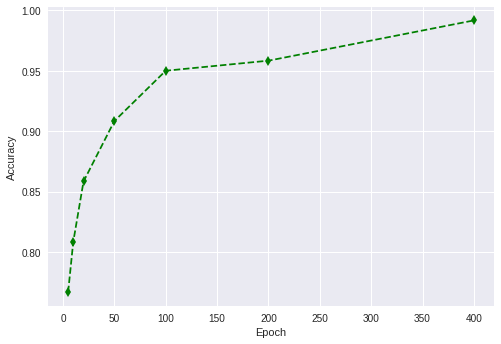

Plot Testing Accuracy


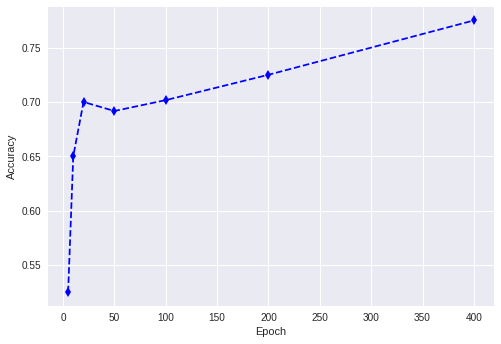

Plot Duration Time


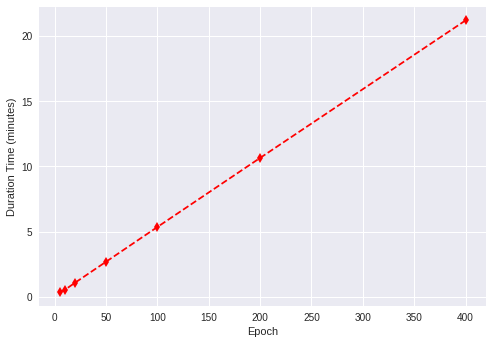

In [0]:
import matplotlib.pyplot as plt

x = df_accuration_lost.Epoch
a = df_accuration_lost.validation_accuracy
b = df_accuration_lost.validation_loss
c = df_accuration_lost.testing_accuracy
d = df_accuration_lost.testing_loss
e = df_accuration_lost.duration_time_in_sec / 60

class accuracy:
    def validation_accuracy(self):
        plt.plot(x,a,'g--d')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.show()
        
    def validation_loss(self):
        plt.plot(x,b,'r--d')
        plt.ylabel('Accuracy')
        plt.show()

    def testing_accuracy (self):
        plt.plot(x,c,'b--d')        
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.show()
        
    def testing_loss (self):
        plt.plot(x,d,'r--d')
        plt.show()
        
    def duration_time (self):
        plt.plot(x,e,'r--d')        
        plt.xlabel('Epoch')
        plt.ylabel('Duration Time (minutes)')
        plt.show()
    
accuracy = accuracy()
print ('Plot Validation Accuracy')
accuracy.validation_accuracy()
# print ('Plot Validation Loss')
# accuracy.validation_loss()
print ('Plot Testing Accuracy')
accuracy.testing_accuracy()
# print ('Plot Testing Loss')
# accuracy.testing_loss()
print ('Plot Duration Time')
accuracy.duration_time()